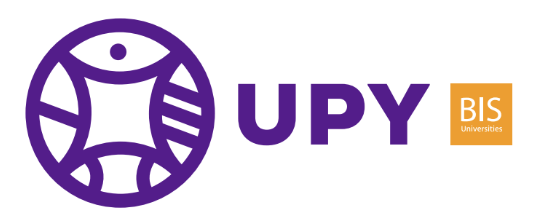

<h1><center>UNIVERSIDAD POLITÉCNICA DE YUCATÁN<h1><center>

# Team:
- Lisette Ruiz Peña
- Adrian Carmona Rodriguez
- Alvaro Rivadeneira

In [91]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Read the data set

For the first part of the code we will make a copy and original reading of the file to save it on a data frame using pandas.

In [92]:
#read data set
data_original = pd.read_csv('train.csv')
data_copy = data_original # we save a copy of the DataFrame to edit later.

In [93]:
data_original.head() # we print the DataFrame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# CLEANING 

In this part we will use some ways to clean the data base without damage some important column

In [94]:
data_original.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


For the first part we will check what are the dimentions of the data set using the funtion `.shape` because we need to check what is the dimension of the DataFrame.

In [95]:
data_or_shape = data_original.shape
data_or_shape

(891, 12)

Why are importan the zero values?
The zero values are importan beacuse if we do not have all the information complete, we need to use different methods to full all lost values, like a linear regression or some functions that we can apply but ussing a librery.

we use in this part the function `.isnull()`

In [96]:
# zero values
missing_values = data_original.isnull().sum().sort_values(ascending= False)
missing_values.head()

Cabin       687
Age         177
Embarked      2
Fare          0
Ticket        0
dtype: int64

Other way to see the zero values is making a histogram of that columns and you could get a visual graph with empty spaces and with that you can check, maybe it is not exact but you can have a idea.

We use different functions of `matplotlib` that is a librery to make so grahps and statistical operations, in this case we are using seaborn that is better than matplotlib to see the graph. `sns.distplot(DataBase_name.column, Bins = )`

C:\Users\Adorian\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Adorian\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\Adorian\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Adorian\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


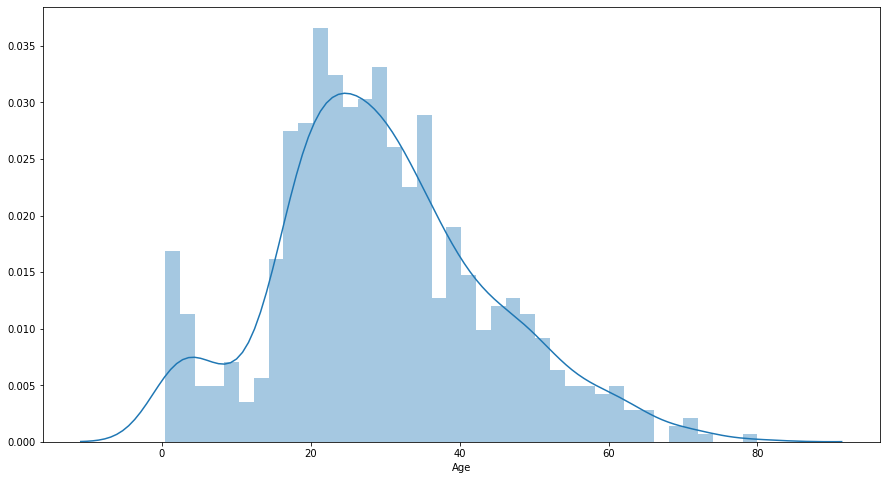

In [97]:
# Plot histogram using seaborn
plt.figure(figsize=(15,8))
sns.distplot(data_original.Age, bins = 40)

As you can see when we count the values null of each column of the DataFrame we got that the column **Cabin** has many zero values, to be certain 687, then we can delete that column because we have 891 data in addition it wont be suitable for the Pronostic.  

In [98]:
del data_original['Cabin']
data_original.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Basic way to full the age column

In this part of the code we will full the Age column because we need to have these data to make a pronostic about who person will survive inside of the titanic. This DataFrame does not have outliers, then we can do this process with the mean function `.mean()` but if we have outliers, we would not use it function and we would use the median function `.median()`

In [99]:
data_original.Age.fillna(data_original.Age.median(),inplace=True)

In [100]:
data_original.isnull().sum() # we check if all values were filled

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

# Advance way to full the age column

In [101]:
train = pd.read_csv('train.csv')
train = pd.DataFrame(train)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We check how many NULL values are there using the fuction `.isnul()` and for the same time we make a sum of these values using `.sum()` after the firts function.

In [102]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

To begin, several predictors of the variable with missing values (in our case ‘Age’ feature) are identified using a correlation matrix. The best predictors are selected and used as independent variables in a regression equation. The variable with missing data is used as the target variable.

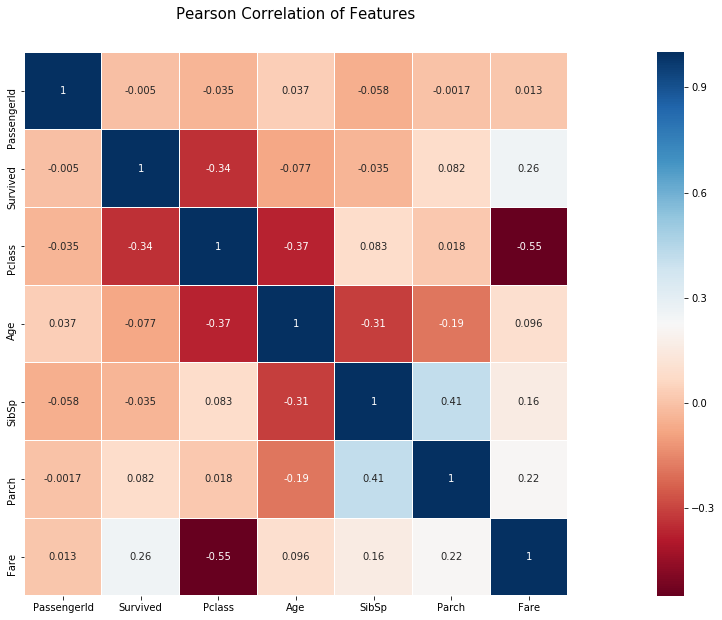

In [103]:
colormap = plt.cm.RdBu
plt.figure(figsize=(32,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In this part we check what type of values we have on the data set and we use the `.info()` function to see the type of values

In [104]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


After that we select the values that are int or float in a new data frame, in this case we select Pclass, SibSp, Parch, Fare and Age, that we will use to training and for the same time we save the fucntion that we got of sklearn called `LinearRegression()` in a variable to use later.

In [105]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
data = train[['Pclass','SibSp','Parch','Fare','Age']]

In [106]:
#Split the dataset that contains the missing values and no missing values are test and train respectively.
x_train = data[data['Age'].notnull()].drop(columns='Age')
y_train = data[data['Age'].notnull()]['Age']
x_test = data[data['Age'].isnull()].drop(columns='Age')
y_test = data[data['Age'].isnull()]['Age']

In [107]:
# we use the variable where we saved the function but we use the function .fit() 
#to execute the LinearRegression function.
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
# we make the prediction in a variable called "predicted"
predicted = linreg.predict(x_train)

In [109]:
# we replace the predicted values on the original dataFrame.
predicted = train.Age[train.Age.isnull()] 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [110]:
# we only see if it is true that the Age colum is full
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Other example (Games Data)

We will read the Second Data Frame and we see if this data Frame has some NULL value using `.isnull()` to see the null values and we use `.sum()` to make a sum of them to check how many values are in total.

In [123]:
train_2 = pd.read_csv('train_2.csv',sep = ',')
train_2 = pd.DataFrame(train_2)
train_2.head()

,Name,Rating,User Rating Count,Price,Developer,Age Rating,Size,Primary Genre,Genres
0,Reversi,3.5,284,2.99,Kiss The Machine,4+,12328960,Games,"Games, Strategy, Board"
1,Morocco,3.0,8376,0.00,Bayou Games,4+,674816,Games,"Games, Board, Strategy"
2,Sudoku (Free),3.5,190394,0.00,Mighty Mighty Good Games,4+,21552128,Games,"Games, Strategy, Puzzle"
3,Senet Deluxe,3.5,28,2.99,RoGame Software,4+,34689024,Games,"Games, Strategy, Board, Education"
4,Sudoku - Classic number puzzle,3.0,47,0.00,OutOfTheBit Ltd,4+,48672768,Games,"Games, Entertainment, Strategy, Puzzle"


In [124]:
train_2.isnull().sum()
# we see that we have null values on price.

Name                 0
Rating               0
User Rating Count    0
Price                6
Developer            0
Age Rating           0
Size                 0
Primary Genre        0
Genres               0
dtype: int64

We make a correlation matrix to see what columns has more relation between them and finally we saw that rating and price that is the column that we need to full have a relation arround of 0.3. We use seaborn to make the correlation matrix.

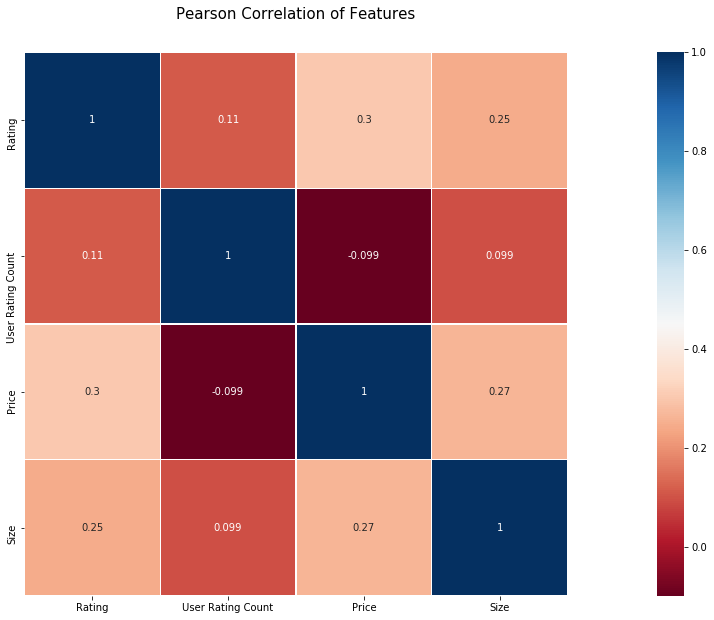

In [125]:
colormap = plt.cm.RdBu
plt.figure(figsize=(32,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_2.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

After that we select the values that are int or float in a new data frame, in this case we select Price, Rating, User Rating Count, that we will use to training and for the same time we save the fucntion that we got of sklearn called LinearRegression() in a variable to use later.

In [126]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression() # we save the function
data_2 = train_2[['Price','Rating','User Rating Count']] # we save the columns

In [127]:
#Split the dataset that contains the missing values and no missing values are test and train respectively.
x_train_2 = data_2[data_2['Price'].notnull()].drop(columns='Price')
y_train_2 = data_2[data_2['Price'].notnull()]['Price']
x_test_2 = data_2[data_2['Price'].isnull()].drop(columns='Price')
y_test_2 = data_2[data_2['Price'].isnull()]['Price']

In [128]:
# we training with x and y values
linreg.fit(x_train_2, y_train_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [141]:
# we make a prediction of the values for Null values in Price
predicted = linreg.predict(x_test_2)

**we see that we have the 6 values for the price column that were predicted.**

In [142]:
print(predicted) 

[0.45490733 1.26662536 0.87926153 0.88086292 1.84410926 1.84410926]


In [147]:
# we change the new values on the empty spaces of the original data frame.
predicted = train_2.Price[train_2.Price.isnull()== True]
train_2.isnull().sum()

Name                 0
Rating               0
User Rating Count    0
Price                6
Developer            0
Age Rating           0
Size                 0
Primary Genre        0
Genres               0
dtype: int64

**Note:** we dont know why in the second example my 6 values were not replece by the new values, acoording us these should be replaced, only that step we could resolve but **we could calculate the price for the 6 empty values.**